In [1]:
import rosbag
import scipy.io as sio
import numpy as np
from pyproj import CRS, Transformer
import matplotlib.pyplot as plt
import math
import rospy
from sensor_msgs.msg import Imu, NavSatFix

## 获取IMU和GPS数据

In [4]:
file_path = "/home/crange/dev/calib_ws/calib_data_52/2023-07-12-10-52-56.bag"
bag = rosbag.Bag(file_path)
bno055_imu_raw = []
gps_ori = []

for topic, msg, t in bag.read_messages():
    if topic == "/bno055_imu/raw":
        bno055_imu_raw.append(msg)
    if topic == "/gps_ori":
        gps_ori.append(msg)
    
print(len(bno055_imu_raw), len(gps_ori))

18365 183


In [5]:
bno055_imu_raw[0]

header: 
  seq: 17173
  stamp: 
    secs: 1689130376
    nsecs: 541602979
  frame_id: "gyro_link"
orientation: 
  x: 0.0
  y: 0.0
  z: 0.9742250442504883
  w: 0.21797947585582733
orientation_covariance: [1000000.0, 0.0, 0.0, 0.0, 1000000.0, 0.0, 0.0, 0.0, 1e-06]
angular_velocity: 
  x: -0.0022222222222222222
  y: 0.0022222222222222222
  z: 0.0003333334192737109
angular_velocity_covariance: [1000000.0, 0.0, 0.0, 0.0, 1000000.0, 0.0, 0.0, 0.0, 1e-06]
linear_acceleration: 
  x: 0.03
  y: -0.3
  z: 9.69
linear_acceleration_covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [107]:
gps_ori[0]

header: 
  seq: 1
  stamp: 
    secs: 1689130377
    nsecs: 210824012
  frame_id: "gps_frame"
status: 
  status: 0
  service: 0
latitude: 31.272108000000003
longitude: 121.1712845
altitude: 4.7
position_covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
position_covariance_type: 4

In [108]:
i = 0
imu_msg = Imu()
imu_msg.header.stamp = bno055_imu_raw[i].header.stamp
imu_msg.header.frame_id = bno055_imu_raw[i].header.frame_id
imu_msg.orientation.x = bno055_imu_raw[i].orientation.x
imu_msg.orientation.y = bno055_imu_raw[i].orientation.y
imu_msg.orientation.z = bno055_imu_raw[i].orientation.z
imu_msg.orientation.w = bno055_imu_raw[i].orientation.w
imu_msg.orientation_covariance = bno055_imu_raw[i].orientation_covariance
imu_msg.angular_velocity.x = bno055_imu_raw[i].angular_velocity.x
imu_msg.angular_velocity.y = bno055_imu_raw[i].angular_velocity.y
imu_msg.angular_velocity.z = bno055_imu_raw[i].angular_velocity.z
imu_msg.angular_velocity_covariance = bno055_imu_raw[i].angular_velocity_covariance
imu_msg.linear_acceleration.x = bno055_imu_raw[i].linear_acceleration.y
imu_msg.linear_acceleration.y = bno055_imu_raw[i].linear_acceleration.x
imu_msg.linear_acceleration.z = bno055_imu_raw[i].linear_acceleration.z
imu_msg.linear_acceleration_covariance = bno055_imu_raw[i].linear_acceleration_covariance

In [109]:
imu_msg

header: 
  seq: 0
  stamp: 
    secs: 1689130376
    nsecs: 541602979
  frame_id: "gyro_link"
orientation: 
  x: 0.0
  y: 0.0
  z: 0.9742250442504883
  w: 0.21797947585582733
orientation_covariance: [1000000.0, 0.0, 0.0, 0.0, 1000000.0, 0.0, 0.0, 0.0, 1e-06]
angular_velocity: 
  x: -0.0022222222222222222
  y: 0.0022222222222222222
  z: 0.0003333334192737109
angular_velocity_covariance: [1000000.0, 0.0, 0.0, 0.0, 1000000.0, 0.0, 0.0, 0.0, 1e-06]
linear_acceleration: 
  x: -0.3
  y: 0.03
  z: 9.69
linear_acceleration_covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [115]:
save_file = 'datas/new_bag.bag'
save_bag = rosbag.Bag(save_file, 'w')

for i in range(len(bno055_imu_raw)):
    imu_msg = Imu()
    imu_msg.header.stamp = bno055_imu_raw[i].header.stamp
    imu_msg.header.frame_id = bno055_imu_raw[i].header.frame_id
    imu_msg.orientation.x = bno055_imu_raw[i].orientation.x
    imu_msg.orientation.y = bno055_imu_raw[i].orientation.y
    imu_msg.orientation.z = bno055_imu_raw[i].orientation.z
    imu_msg.orientation.w = bno055_imu_raw[i].orientation.w
    imu_msg.orientation_covariance = bno055_imu_raw[i].orientation_covariance
    imu_msg.angular_velocity.x = bno055_imu_raw[i].angular_velocity.x
    imu_msg.angular_velocity.y = bno055_imu_raw[i].angular_velocity.y
    imu_msg.angular_velocity.z = bno055_imu_raw[i].angular_velocity.z
    imu_msg.angular_velocity_covariance = bno055_imu_raw[i].angular_velocity_covariance
    imu_msg.linear_acceleration.x = bno055_imu_raw[i].linear_acceleration.y
    imu_msg.linear_acceleration.y = bno055_imu_raw[i].linear_acceleration.x
    imu_msg.linear_acceleration.z = bno055_imu_raw[i].linear_acceleration.z
    imu_msg.linear_acceleration_covariance = bno055_imu_raw[i].linear_acceleration_covariance
    save_bag.write('/imu/data', imu_msg)


for i in range(len(gps_ori)):
    fix_msg = NavSatFix()
    fix_msg.header.stamp = gps_ori[i].header.stamp
    fix_msg.header.frame_id = gps_ori[i].header.frame_id
    fix_msg.status.status = gps_ori[i].status.status
    fix_msg.status.service = gps_ori[i].status.service
    fix_msg.latitude = gps_ori[i].latitude
    fix_msg.longitude = gps_ori[i].longitude
    fix_msg.altitude = gps_ori[i].altitude
    fix_msg.position_covariance = gps_ori[i].position_covariance
    fix_msg.position_covariance_type = gps_ori[i].position_covariance_type
    save_bag.write('/fix', fix_msg)

save_bag.close()

## WGS84转ENU

In [ ]:
gps = []
for i in range(len(gps_ori)):
    gps.append([gps_ori[i].longitude, gps_ori[i].latitude, gps_ori[i].altitude])

In [ ]:
enu_crs = CRS.from_string("+proj=utm +zone=50 +ellps=GRS80 +units=m +no_defs")
wgs84_crs = CRS.from_string("+proj=longlat +datum=WGS84 +no_defs")
trans_wgs84_to_enu = Transformer.from_crs(wgs84_crs, enu_crs)

In [ ]:
enu = []
base_enu = np.mat([trans_wgs84_to_enu.transform(gps[0][0], gps[0][1], gps[0][2])])
for i in range(len(gps_ori)):
    temp_enu = np.mat([trans_wgs84_to_enu.transform(gps[i][0], gps[i][1], gps[i][2])])
    enu.append(temp_enu - base_enu)

In [ ]:
x = []
y = []
for i in range(len(gps_ori)):
    x.append(enu[i][0, 0])
    y.append(enu[i][0, 1])

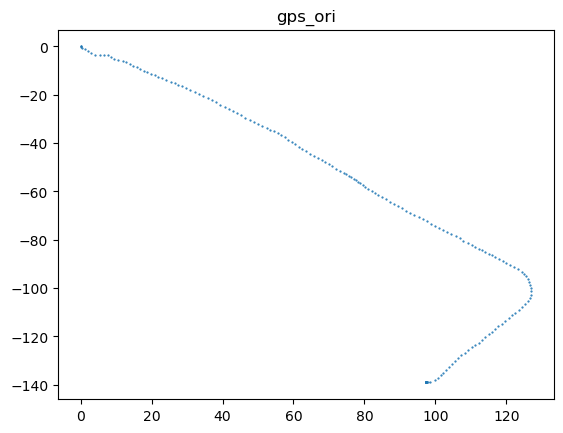

In [ ]:
plt.title('gps_ori')
plt.scatter(x, y, 0.3)
plt.show()

## 使用旋转矩阵修正符号

In [ ]:
t = 0
acc = np.mat([[bno055_imu_raw[t].linear_acceleration.x], 
             [bno055_imu_raw[t].linear_acceleration.y], 
             [-bno055_imu_raw[t].linear_acceleration.z]])
Rotatione3D = np.mat([[0.0000000,1.0000000,-0.0000000],
                      [1.0000000,0.0000000,-0.0000000],
                      [0.0000000,-0.0000000,-1.0000000]])
print(acc)
print(Rotatione3D * acc)

[[-0.3 ]
 [ 0.03]
 [-9.69]]
[[ 0.03]
 [-0.3 ]
 [ 9.69]]
